# Exploratory Data Analysis of Bicycle Accidents In Great Britain (1979 - 2018)

#### Load libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scikit_posthocs as sp
import researchpy as rp
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline 

In [2]:
# import accidents dataset.
df_Ac = pd.read_csv('E:\Site\Data Analysis\Datasets\Bicycle Accidents UK\Accidents.csv')
df_Ac.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


In [3]:
# import bikers dataset
df_Bk = pd.read_csv('E:\Site\Data Analysis\Datasets\Bicycle Accidents UK\Bikers.csv')
df_Bk.head()

,Accident_Index,Gender,Severity,Age_Grp
0,197901A1SEE71,Male,Serious,36 to 45
1,197901A2JDW40,Male,Slight,46 to 55
2,197901A4IJV90,Male,Slight,46 to 55
3,197901A4NIE33,Male,Slight,36 to 45
4,197901A4SKO47,Male,Slight,46 to 55


#### Functions

In [4]:
# Check duplicates
def sum_duplicates(df):
    """Returns the number of duplicates in data"""
    sum_of_duplicates = df.duplicated().sum()
    return f"There are {sum_of_duplicates} number of duplicates"

# Check null values
def sum_null_values(df):
    """Returns the number of null values in data"""
    sum_of_null_values = df.isnull().sum()
    return sum_of_null_values

# Set index of dataset
def change_index(df,df_col,drop_index=True):
    """Returns data with df_col as index"""
    df = df.set_index(df_col,drop=drop_index)
    return df

# Summary statistics of quantitative data
def sum_stats(df,df_col):
    """Returns the measures of central tendency and spread"""
    
    # Mean of number of vehicles
    df_mean = df[df_col].mean()

    # Median of number of vehicles
    df_median = df[df_col].median()
    df_25_centile = np.percentile(df[df_col], 25)
    df_75_centile = np.percentile(df[df_col], 75)

    # Mode of number of vehicles
    df_mode = stats.mode(df[df_col])

    # Variance of number of vehicles
    df_var = df[df_col].var()

    # Standard deviation of number of vehicles
    df_std = df[df_col].std()

    # Range of number of vehicles
    df_range = df[df_col].max() - df[df_col].min() 

    # IQR of number of vehicles 
    qt_75 = df[df_col].quantile(0.75)
    qt_25 = df[df_col].quantile(0.25) 
    df_iqr = qt_75 - qt_25


    print(f'Mean: {df_mean}')
    print(f'25th Percentile: {df_25_centile} | Median: {df_median} | 75th Percentile: {df_75_centile}')
    print(f'Mode: {df_mode.mode} | Count: {df_mode.count}')
    print(f'Variance: {df_var}')
    print(f'Std Dev.: {df_std}')
    print(f'Range: {df_range}')
    print(f'IQR: {qt_75}(75th Quantile) - {qt_25}(25th Qauntile)  = {df_iqr}')


# Get frequency of individual values categorical data
def get_value_count(df,df_col):
    """Returns count of value types"""
    df = pd.DataFrame(df[df_col].value_counts())
    return df

# Get frequency and percentage of column
def get_count_percent(df,df_col):
    """Returns frequency of column"""
    df = pd.DataFrame({
    'Count (n)': df[df_col].value_counts(),
    'Percentage (%)': df[df_col].value_counts(normalize=True) * 100
    })
    return df

# Perform normality test on data
# check_normality(df['column'], 'column')
def check_normality(data, column_name):
    """Comprehensive normality check"""
    
    print(f"\n{'='*50}")
    print(f"Normality Tests for: {column_name}")
    print(f"{'='*50}")
    
    # 1. Shapiro-Wilk (best for n < 5000)
    stat, p = stats.shapiro(data)
    print(f"\nShapiro-Wilk Test:")
    print(f"  Statistic: {stat:.4f}")
    print(f"  P-value: {p:.4f}")
    print(f"  Normal? {'Yes' if p > 0.05 else 'No'}")
    
    # 2. Kolmogorov-Smirnov
    stat, p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"\nKolmogorov-Smirnov Test:")
    print(f"  Statistic: {stat:.4f}")
    print(f"  P-value: {p:.4f}")
    print(f"  Normal? {'Yes' if p > 0.05 else 'No'}")
    
    # 5. Skewness and Kurtosis
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    print(f"\nDescriptive Statistics:")
    print(f"  Skewness: {skew:.4f} (normal ≈ 0. -1 to +1)")
    print(f"  Kurtosis: {kurt:.4f} (normal ≈ 0. -1 to +1)")

# Get frequency of crossed columns
def count_cross_tabs(df,df_col_one,df_col_two):
    """Returns frequency of cross tabs"""
    df = pd.crosstab(df[df_col_one],df[df_col_two])
    return df

# Get percentage of crossed columns
def percent_cross_tabs(df,df_col_one,df_col_two):
    """Returns percentage of cross tabs"""
    df = pd.crosstab(df[df_col_one],df[df_col_two], normalize='index') * 100
    return df

# Get statistics of group by table
def stats_groupby(df,df_col_one,df_col_two):
    """Returns the aggregate statistics of two variables"""
    df = pd.DataFrame(df.groupby(df_col_one)[df_col_two].agg(['median', 'mean', 'count','sum'])).sort_values('count')
    df['percentage'] = (df['count'] / df['count'].sum()) * 100
    return df


# Run Kruskal-Wallis H test
def run_kruskal_wallis(df,df_col_one,df_col_two):
    """Returns the result of the Kruskal Wallis test"""
    df_test_columns = df[[df_col_one,df_col_two]]
    df_grp_by = df_test_columns.groupby([df_col_one])
    df_data = []
    for name, group in df_grp_by:
        df_data.append(group[df_col_two].values)

    df_result = stats.kruskal(*df_data)
    
    if df_result.pvalue >= 0.05:
        print(f'K-H statistic: {df_result.statistic} \np-value: {df_result.pvalue} \nThe relationship/difference may not be significant')
    elif df_result.pvalue < 0.05:
        # Run Dunn's test and epsilon sq. if difference/relationship is significant
        dunn_result = run_dunn_test(df,df_col_one,df_col_two)
        epsilon_sq = run_epsilon_sq(df_result.statistic, len(df))
        kruskal_result_dict = {
            'H_stat': df_result.statistic,
            'p_val': df_result.pvalue,
            'comment': 'The relationship/difference may be significant',
            'dunn_posthoc': dunn_result,
            'epsilon_sq': epsilon_sq
        }
        return kruskal_result_dict
        # print(f'K-H statistic: {df_result.statistic} \np-value: {df_result.pvalue} \nThe relationship/difference may be significant')
        

# Run posthoc on Kruskal-Wallis(Dunn's test with bonferroni)
def run_dunn_test(df,df_col_one,df_col_two):
    """Returns Dunn's posthoc results"""
    dunn_matrix = sp.posthoc_dunn(
            df,
            val_col= df_col_two,
            group_col=df_col_one,
            p_adjust='bonferroni'  # good default; less conservative than Bonferroni
        )
    return dunn_matrix

def run_epsilon_sq(h_stat,sample_size):
    """Returns epsilon squared, the effect size for Kruskal-Wallis
    This based on a formular from Statistical reasoning in the behavioral sciences (7th ed.)
    Page 387"""
    
    denominator_one = (sample_size**2 - 1)
    denominator_two = (sample_size + 1)

    epsilon_squared_rank = h_stat / (denominator_one / denominator_two)
    return epsilon_squared_rank

# Run the Chi-square test 
def run_chi_square(df,df_col_one,df_col_two):
    """Returns the result of the Chi-square test"""
    cross_tabs = pd.crosstab(df[df_col_one], df[df_col_two])
    cross_tabs_result = stats.chi2_contingency(cross_tabs)
    exp_val_check = len(cross_tabs_result.expected_freq[cross_tabs_result.expected_freq < 5])/len(cross_tabs_result.expected_freq) * 100
    
    result_dict= {}
    if cross_tabs_result.pvalue >= 0.05:
        result_dict = {
            "comment" : 'Difference or relationship not significant',
            "chi_statistic" : cross_tabs_result.statistic,
            "pvalue" : cross_tabs_result.pvalue,
            "dof" : cross_tabs_result.dof,
            "percent_exp_vals_<_5": exp_val_check,
            "cross_tab" : cross_tabs,
            "expected" : cross_tabs_result.expected_freq
        } 
    elif cross_tabs_result.pvalue < 0.05 and exp_val_check < 20:
        # Run cramer's v and pearson's residuals if relationship is statistically significant
        cramers_v = stats.contingency.association(cross_tabs, method="cramer")
        residuals = run_pearson_residual(cross_tabs, cross_tabs_result.expected_freq)
        result_dict = {
            "comment" : 'Difference or relationship is significant',
            "chi_statistic" : cross_tabs_result.statistic,
            "pvalue" : cross_tabs_result.pvalue,
            "dof" : cross_tabs_result.dof,
            "percent_exp_vals_<_5": exp_val_check,
            "cross_tab" : cross_tabs,
            "expected" : cross_tabs_result.expected_freq,
            "cramers_v" : cramers_v,
            "residuals": residuals
        }
    elif cross_tabs_result.pvalue < 0.05 and exp_val_check > 20:
        result_dict = {
            "comment" : 'Difference or relationship is significant but assumption for expected values in Chi-test failed',
            "chi_statistic" : cross_tabs_result.statistic,
            "pvalue" : cross_tabs_result.pvalue,
            "dof" : cross_tabs_result.dof,
            "percent_exp_vals_<_5": exp_val_check,
            "cross_tab" : cross_tabs,
            "expected" : cross_tabs_result.expected_freq
        }
    
    return result_dict

def run_pearson_residual(obv_data, exptd_data):
    """Runs the Pearson residual to from observed and expected, formula from 
    Practical Statistics for Data Scientists, 2nd Edition, Bruce P. et al(p. 125)"""
    diff_obv_exptd = obv_data - exptd_data
    residuals = diff_obv_exptd / np.sqrt(exptd_data)

    return residuals

### Descriptive Statistics

#### Get summary of accident dataset

In [5]:
# get shape of accidents dataset
df_Ac.shape

(827861, 11)

In [6]:
# get summary of accidents dataset
df_Ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827861 entries, 0 to 827860
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Accident_Index        827861 non-null  object 
 1   Number_of_Vehicles    827861 non-null  int64  
 2   Number_of_Casualties  827861 non-null  int64  
 3   Date                  827861 non-null  object 
 4   Time                  827861 non-null  object 
 5   Speed_limit           827861 non-null  float64
 6   Road_conditions       827861 non-null  object 
 7   Weather_conditions    827861 non-null  object 
 8   Day                   827861 non-null  object 
 9   Road_type             827861 non-null  object 
 10  Light_conditions      827861 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 69.5+ MB


In [7]:
# get summary of accidents dataset
df_Ac.describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit
count,827861.000000,827861.000000,827861.000000
mean,1.986178,1.047212,33.340934
std,0.311600,0.253509,9.278129
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,30.000000
50%,2.000000,1.000000,30.000000
75%,2.000000,1.000000,30.000000
max,13.000000,60.000000,660.000000


#### Data Cleaning for Accidents Dataset

In [8]:
# check the number of duplicates
sum_duplicates(df_Ac)

'There are 0 number of duplicates'

In [9]:
# check the number of null values
sum_null_values(df_Ac)

Accident_Index          0
Number_of_Vehicles      0
Number_of_Casualties    0
Date                    0
Time                    0
Speed_limit             0
Road_conditions         0
Weather_conditions      0
Day                     0
Road_type               0
Light_conditions        0
dtype: int64

In [10]:
# backup original dataset before cleaning
df_Ac_clean = df_Ac
df_Ac_clean.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


In [11]:
# set index of dataframe
df_Ac_clean = change_index(df_Ac,'Accident_Index',False)
df_Ac_clean

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
Accident_Index,,,,,,,,,,,
197901A1SEE71,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
197901A2JDW40,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
197901A4IJV90,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
197901A4NIE33,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
197901A4SKO47,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit
...,...,...,...,...,...,...,...,...,...,...,...
2018983118818,2018983118818,2,1,2018-02-07,14:55,30.0,Dry,Clear,Monday,Single carriageway,Daylight
2018983119218,2018983119218,2,1,2018-07-24,07:45,30.0,Dry,Clear,Tuesday,Single carriageway,Daylight
2018983120618,2018983120618,2,1,2018-10-08,13:25,20.0,Dry,Clear,Friday,Single carriageway,Daylight


In [12]:
# Change the type of Date from object to datetime
df_Ac_clean_Date = pd.to_datetime(df_Ac_clean["Date"], format="%Y-%m-%d", errors="raise")
df_Ac_clean['Date'] = df_Ac_clean_Date

# Create combined DateTime column
# df_Ac_clean["AccidentDateTime"] = pd.to_datetime(
#     df_Ac_clean["Date"].astype(str) + " " + df_Ac_clean["Time"].astype(str),
#     format="%Y-%m-%d %H:%M",
#     errors="raise"
# )

In [13]:
# Find inconsistent values in Road conditions column
get_value_count(df_Ac_clean, 'Road_conditions')

,count
Road_conditions,
Dry,633936
Wet,184279
Frost,6020
Snow,1710
Missing Data,1648
Flood,268


In [14]:
# Find inconsistent values in Weather conditions column
get_value_count(df_Ac_clean, 'Weather_conditions')

,count
Weather_conditions,
Clear,683162
Rain,82007
Unknown,24081
Clear and windy,11891
Other,11820
Rain and windy,8808
Fog,3369
Snow,2086
Snow and windy,483


In [15]:
# Change 'Missing data' entries to 'Unknown'
df_Ac_clean['Weather_conditions'] = df_Ac_clean['Weather_conditions'].replace('Missing data', 'Unknown')

In [16]:
# Find inconsistent values in Day column
get_value_count(df_Ac_clean, 'Day')

,count
Day,
Wednesday,136756
Tuesday,136534
Thursday,136263
Friday,132066
Monday,125749
Saturday,87652
Sunday,72841


In [17]:
# Find inconsistent values in Road type column
get_value_count(df_Ac_clean, 'Road_type')

,count
Road_type,
Single carriageway,656703
Roundabout,75066
Dual carriageway,59037
Unknown,30647
One way sreet,5562
Slip road,846


In [18]:
# Change 'One way sreet' entries to 'One way street'
df_Ac_clean['Road_type'] = df_Ac_clean['Road_type'].replace('One way sreet', 'One way street')

In [19]:
# Find inconsistent values in light conditions column
get_value_count(df_Ac_clean, 'Light_conditions')

,count
Light_conditions,
Daylight,660657
Darkness lights lit,142039
Darkness no lights,25165


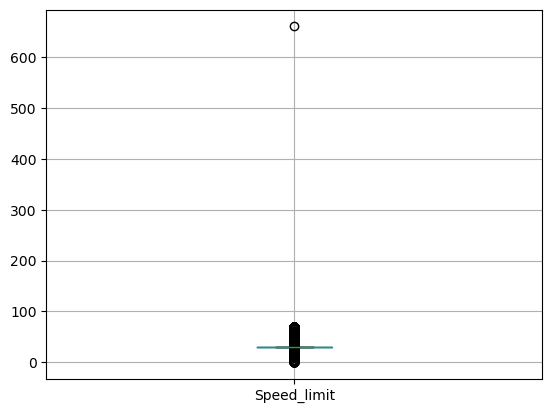

In [20]:
# Boxplot of Speed limit column
df_Ac_clean.boxplot(column=['Speed_limit'])
plt.show()

In [21]:
# Handle outliers in speed limit column
# UK speed limits are between 20mph and 70mph. 
# The value of 660 can be treated as a typographical error and replaced with 66mph, 60mph or the mean.

df_Ac_clean[df_Ac_clean['Speed_limit'] > 600]
df_Ac_clean.at['199032C064990','Speed_limit'] = 66
df_Ac_clean.at['199032C064990','Speed_limit']

np.float64(66.0)

In [22]:
# Check validity of number of casualties and number of vehicles

df_Ac_clean[df_Ac_clean['Number_of_Casualties'] == 0]
df_Ac_clean[df_Ac_clean['Number_of_Vehicles'] == 0]

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
Accident_Index,,,,,,,,,,,


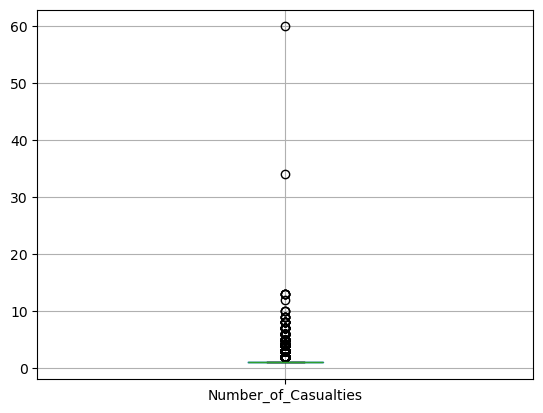

In [23]:
# Boxplot of number of casualties
# Some values can be considered as outliers visually and using the IQR
# They were however not removed because it is possible that accidents tragically may involve such casualties

df_Ac_clean.boxplot(column=['Number_of_Casualties'])
plt.show()

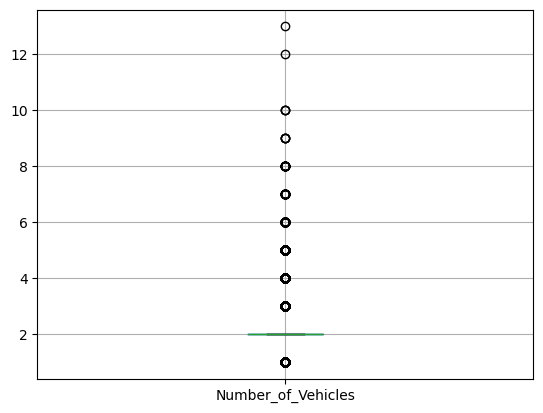

In [24]:
# Boxplot of number of vehicles
# Some values can be considered as outliers visually and using the IQR
# They were however not removed because it is possible that accidents tragically may involve such number of vehicles
df_Ac_clean.boxplot(column=['Number_of_Vehicles'])
plt.show()

#### Get summary of Bikers dataset

In [25]:
# get shape of bikers dataset
df_Bk.shape

(827871, 4)

In [26]:
# get summary of bikers dataset
df_Bk.describe()

,Accident_Index,Gender,Severity,Age_Grp
count,827871,827871,827871,827871
unique,827871,3,3,9
top,2018983133818,Male,Slight,11 to 15
freq,1,660031,681578,169945


In [27]:
# get summary of bikers dataset
df_Bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827871 entries, 0 to 827870
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Accident_Index  827871 non-null  object
 1   Gender          827871 non-null  object
 2   Severity        827871 non-null  object
 3   Age_Grp         827871 non-null  object
dtypes: object(4)
memory usage: 25.3+ MB


#### Data cleaning for Bikers dataset

In [28]:
# check the number of duplicates
sum_duplicates(df_Bk)

'There are 0 number of duplicates'

In [29]:
# check the number of null values
sum_null_values(df_Bk)

Accident_Index    0
Gender            0
Severity          0
Age_Grp           0
dtype: int64

In [30]:
# Find inconsistent values in the gender column
get_value_count(df_Bk, 'Gender')

,count
Gender,
Male,660031
Female,167721
Other,119


In [31]:
# Find inconsistent values in the severity column
get_value_count(df_Bk, 'Severity')

,count
Severity,
Slight,681578
Serious,139563
Fatal,6730


In [32]:
# Find inconsistent values in the age group column
get_value_count(df_Bk, 'Age_Grp')

,count
Age_Grp,
11 to 15,169945
26 to 35,145081
16 to 20,122604
36 to 45,103774
21 to 25,87292
46 to 55,73578
6 to 10,68021
56 to 65,41913
66 to 75,15663


In [33]:
# backup original dataset before cleaning
df_Bk_clean = df_Bk
df_Bk_clean.head()

,Accident_Index,Gender,Severity,Age_Grp
0,197901A1SEE71,Male,Serious,36 to 45
1,197901A2JDW40,Male,Slight,46 to 55
2,197901A4IJV90,Male,Slight,46 to 55
3,197901A4NIE33,Male,Slight,36 to 45
4,197901A4SKO47,Male,Slight,46 to 55


In [34]:
# set index of dataframe
df_Bk_clean = change_index(df_Bk_clean,'Accident_Index')
df_Bk_clean.head()

,Gender,Severity,Age_Grp
Accident_Index,,,
197901A1SEE71,Male,Serious,36 to 45
197901A2JDW40,Male,Slight,46 to 55
197901A4IJV90,Male,Slight,46 to 55
197901A4NIE33,Male,Slight,36 to 45
197901A4SKO47,Male,Slight,46 to 55


In [35]:
# Categorize time of the day into traffic status

# Morning Rush Hour: 7-9
# Inter Peak: 10-15
# Afternoon School Pickup: 15-16
# Evening Rush Hour: 17-19
# Late Evening: 19+

df_Ac_clean['Traffic_status'] = df_Ac_clean["Time"].str.split(':').str[0].astype(int).apply(
    lambda x: 
        'Morning Rush Hour' if (7 <= x <= 9) else (
        'Day Off-Peak' if (10 <= x <= 14) else (
        'Afternoon School Pickup' if (15 <= x <= 16) else (
        'Evening Rush Hour' if (17 <= x <= 19) else (
        'Night/Dawn Off-Peak'))))
)
df_Ac_clean.head(10)

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Traffic_status
Accident_Index,,,,,,,,,,,,
197901A1SEE71,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Evening Rush Hour
197901A2JDW40,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Morning Rush Hour
197901A4IJV90,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Morning Rush Hour
197901A4NIE33,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Day Off-Peak
197901A4SKO47,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Evening Rush Hour
197901A5CKE54,197901A5CKE54,2,1,1979-05-01,02:50,40.0,Snow,Unknown,Friday,Dual carriageway,Darkness lights lit,Night/Dawn Off-Peak
197901A5UJC75,197901A5UJC75,2,1,1979-05-01,20:45,30.0,Wet,Unknown,Friday,Single carriageway,Darkness lights lit,Night/Dawn Off-Peak
197901A6ODP50,197901A6ODP50,2,1,1979-06-01,14:15,70.0,Snow,Unknown,Saturday,Unknown,Daylight,Day Off-Peak
197901A6VEC34,197901A6VEC34,2,1,1979-06-01,21:20,30.0,Wet,Unknown,Saturday,Roundabout,Darkness lights lit,Night/Dawn Off-Peak


In [36]:
# Merge the accidents and bikers tables

df_Ac_merge = df_Ac_clean.drop('Accident_Index', axis=1)
df_Ac_Bk_clean = pd.merge(df_Ac_merge, df_Bk_clean, on='Accident_Index', how='left')
df_Ac_Bk_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827861 entries, 197901A1SEE71 to 2018983133818
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Number_of_Vehicles    827861 non-null  int64         
 1   Number_of_Casualties  827861 non-null  int64         
 2   Date                  827861 non-null  datetime64[ns]
 3   Time                  827861 non-null  object        
 4   Speed_limit           827861 non-null  float64       
 5   Road_conditions       827861 non-null  object        
 6   Weather_conditions    827861 non-null  object        
 7   Day                   827861 non-null  object        
 8   Road_type             827861 non-null  object        
 9   Light_conditions      827861 non-null  object        
 10  Traffic_status        827861 non-null  object        
 11  Gender                827861 non-null  object        
 12  Severity              827861 non-null  objec

#### Univariate Analysis of Bikers Dataset

In [37]:
# Distribution of injury severity
df_Bk_severity_dist = get_count_percent(df_Bk_clean,'Severity')
df_Bk_severity_dist

,Count (n),Percentage (%)
Severity,,
Slight,681578,82.329010
Serious,139563,16.858061
Fatal,6730,0.812929


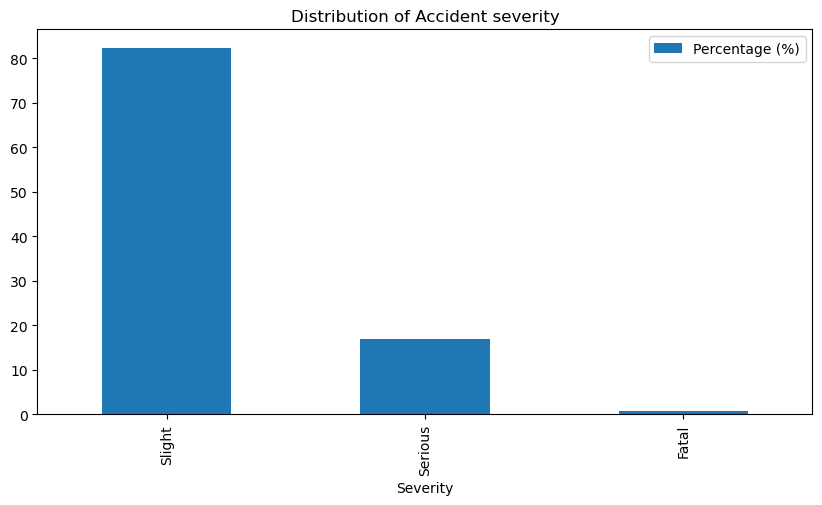

In [38]:
# Bar chart of severity distribution

df_Bk_severity_dist.plot(kind='bar', y='Percentage (%)', title='Distribution of Accident severity', figsize=(10,5))
plt.show()

In [39]:
# Distribution of casualties by gender
df_Bk_gender_dist = get_count_percent(df_Bk_clean,'Gender')
df_Bk_gender_dist

,Count (n),Percentage (%)
Gender,,
Male,660031,79.726310
Female,167721,20.259316
Other,119,0.014374


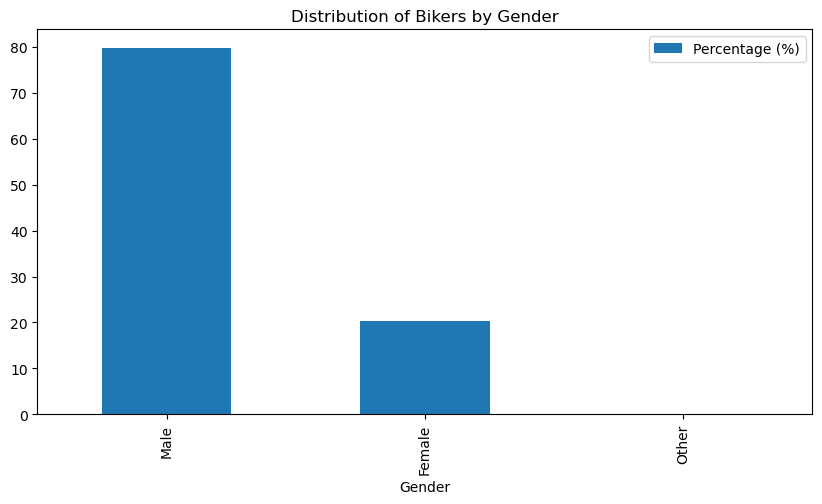

In [40]:
# Bar chart of gender distribution
df_Bk_gender_dist.plot(kind='bar', y='Percentage (%)', title='Distribution of Bikers by Gender', figsize=(10,5))
plt.show()

In [41]:
# Distribution of casualties by age group
df_Bk_age_grp_dist = get_count_percent(df_Bk_clean,'Age_Grp')
df_Bk_age_grp_dist

,Count (n),Percentage (%)
Age_Grp,,
11 to 15,169945,20.527957
26 to 35,145081,17.524590
16 to 20,122604,14.809554
36 to 45,103774,12.535045
21 to 25,87292,10.544155
46 to 55,73578,8.887617
6 to 10,68021,8.216377
56 to 65,41913,5.062745
66 to 75,15663,1.891961


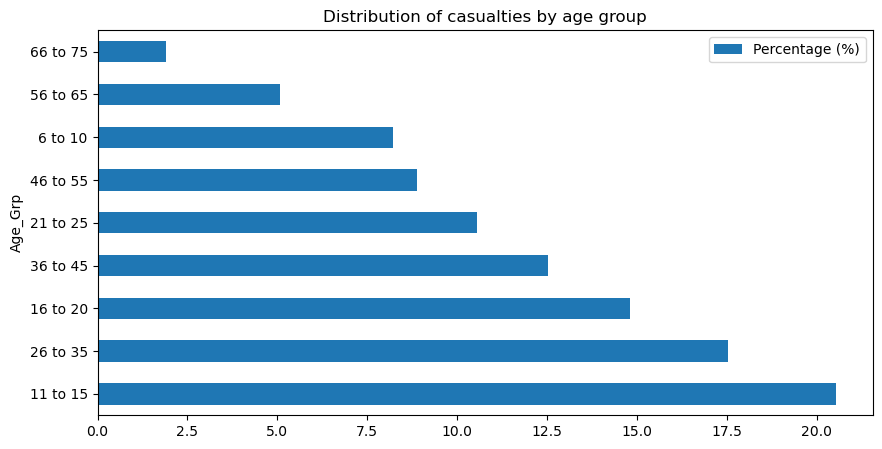

In [42]:
# Bar chart of age group distribution
df_Bk_age_grp_dist.plot(kind='barh', y='Percentage (%)', title='Distribution of casualties by age group', figsize=(10,5))
plt.show()

#### Univariate Analysis of Accident Dataset

In [43]:
sum_stats(df_Ac_clean,'Number_of_Vehicles')

Mean: 1.9861776312690174
25th Percentile: 2.0 | Median: 2.0 | 75th Percentile: 2.0
Mode: 2 | Count: 758784
Variance: 0.09709471484820836
Std Dev.: 0.3116002484726358
Range: 12
IQR: 2.0(75th Quantile) - 2.0(25th Qauntile)  = 0.0


In [44]:
sum_stats(df_Ac_clean,'Number_of_Casualties')

Mean: 1.0472120319715508
25th Percentile: 1.0 | Median: 1.0 | 75th Percentile: 1.0
Mode: 1 | Count: 792685
Variance: 0.06426656407018987
Std Dev.: 0.25350850887137866
Range: 59
IQR: 1.0(75th Quantile) - 1.0(25th Qauntile)  = 0.0


In [45]:
sum_stats(df_Ac_clean,'Speed_limit')

Mean: 33.34021653393504
25th Percentile: 30.0 | Median: 30.0 | 75th Percentile: 30.0
Mode: 30.0 | Count: 686784
Variance: 85.6106096852816
Std Dev.: 9.252600158078895
Range: 70.0
IQR: 30.0(75th Quantile) - 30.0(25th Qauntile)  = 0.0


In [46]:
# Distribution of road conditions during accidents
df_Ac_road_cond_dist = get_count_percent(df_Ac_clean,'Road_conditions')
df_Ac_road_cond_dist

,Count (n),Percentage (%)
Road_conditions,,
Dry,633936,76.575174
Wet,184279,22.259655
Frost,6020,0.727175
Snow,1710,0.206556
Missing Data,1648,0.199067
Flood,268,0.032373


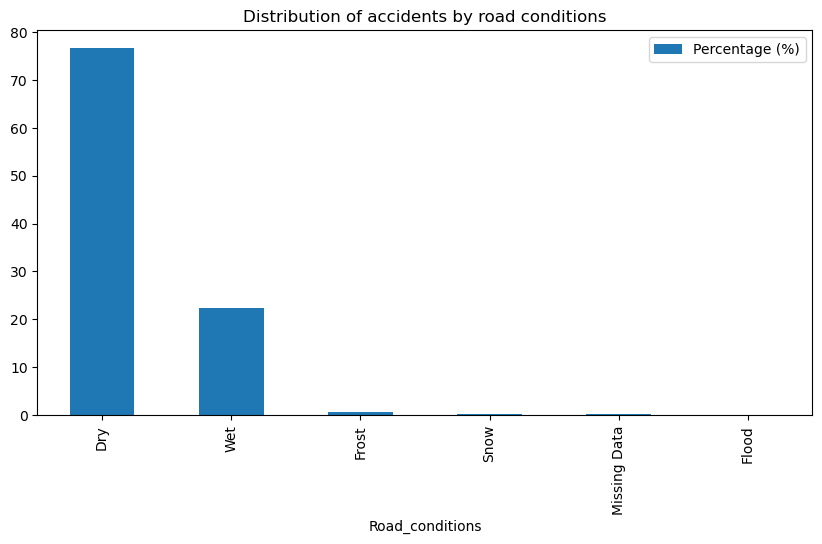

In [47]:
# Bar chart for distribution of road conditions
df_Ac_road_cond_dist.plot(kind='bar', y='Percentage (%)',title = 'Distribution of accidents by road conditions', figsize=(10, 5))
plt.show()

In [48]:
# Distribution of weather conditions during accidents
df_Ac_weather_cond_dist = get_count_percent(df_Ac_clean,'Weather_conditions')
df_Ac_weather_cond_dist

,Count (n),Percentage (%)
Weather_conditions,,
Clear,683162,82.521341
Rain,82007,9.905890
Unknown,24235,2.927424
Clear and windy,11891,1.436352
Other,11820,1.427776
Rain and windy,8808,1.063947
Fog,3369,0.406952
Snow,2086,0.251975
Snow and windy,483,0.058343


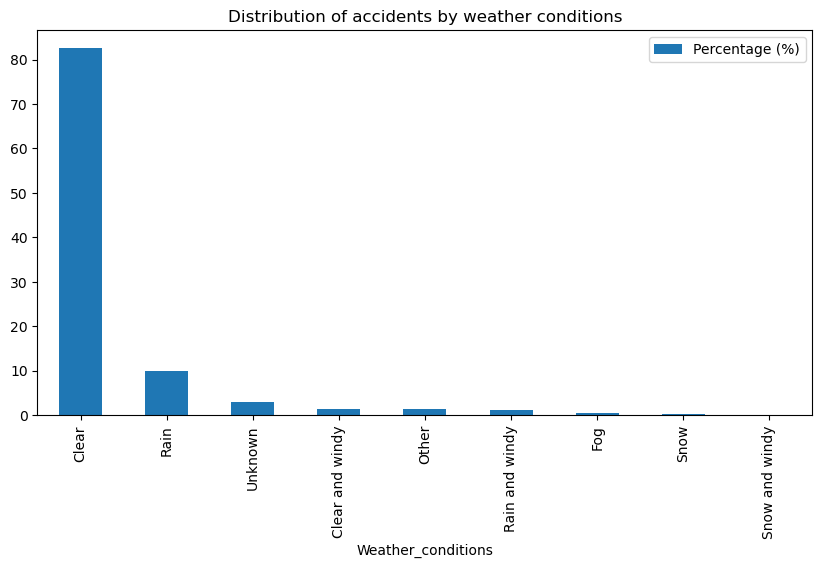

In [49]:
# Bar chart of the distribution of weather conditions
df_Ac_weather_cond_dist.plot(kind='bar', y='Percentage (%)', title ='Distribution of accidents by weather conditions', figsize=(10,5))
plt.show()

In [50]:
# Distribution of days of the week accidents happened
df_Ac_days_dist = get_count_percent(df_Ac_clean,'Day')
df_Ac_days_dist

,Count (n),Percentage (%)
Day,,
Wednesday,136756,16.519198
Tuesday,136534,16.492382
Thursday,136263,16.459647
Friday,132066,15.952678
Monday,125749,15.189627
Saturday,87652,10.587768
Sunday,72841,8.798699


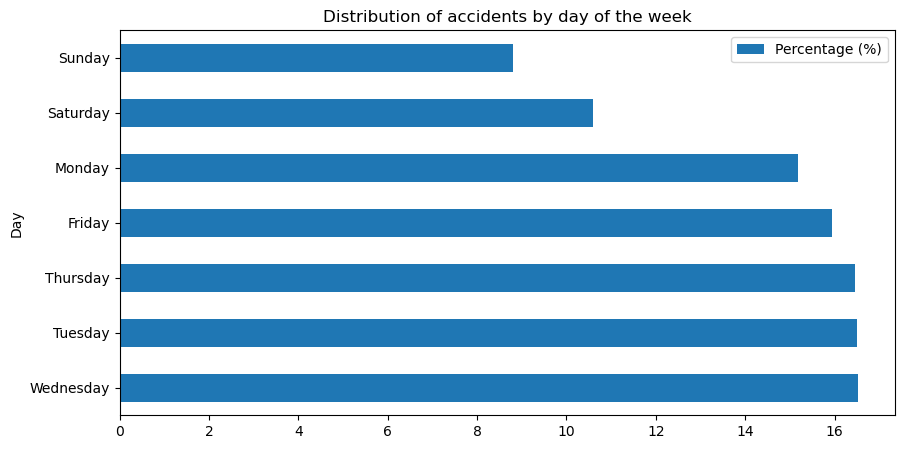

In [51]:
# Bar chart for distribution by day
df_Ac_days_dist.plot(kind='barh', y='Percentage (%)', title = 'Distribution of accidents by day of the week', figsize=(10,5))
plt.show()

In [52]:
# Distribution of the roads on which happened
df_Ac_road_type_dist = get_count_percent(df_Ac_clean,'Road_type')
df_Ac_road_type_dist

,Count (n),Percentage (%)
Road_type,,
Single carriageway,656703,79.325273
Roundabout,75066,9.067464
Dual carriageway,59037,7.131270
Unknown,30647,3.701950
One way street,5562,0.671852
Slip road,846,0.102191


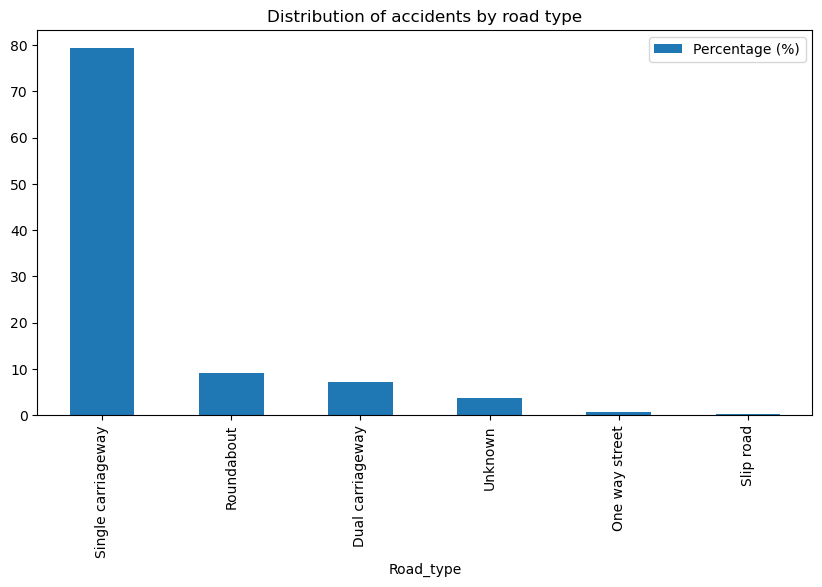

In [53]:
# Bar chart for distribution by road type
df_Ac_road_type_dist.plot(kind='bar', y='Percentage (%)',title = 'Distribution of accidents by road type', figsize=(10,5))
plt.show()

In [54]:
# Distribution of the light conditions during accidents
df_Ac_light_condition_dist = get_count_percent(df_Ac_clean,'Light_conditions')
df_Ac_light_condition_dist

,Count (n),Percentage (%)
Light_conditions,,
Daylight,660657,79.802890
Darkness lights lit,142039,17.157349
Darkness no lights,25165,3.039762


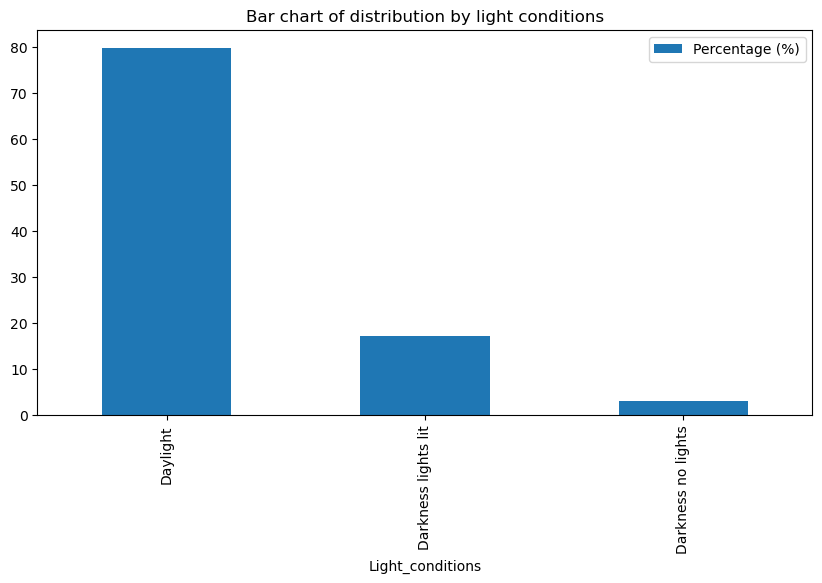

In [55]:
# Bar chart of accident distribution by light condtions
df_Ac_light_condition_dist.plot(kind='bar', y='Percentage (%)', title = 'Bar chart of distribution by light conditions', figsize=(10,5))
plt.show()

##### Normality Tests

In [56]:
# Statistical test for normality of Number of vehicles
check_normality(df_Ac_clean['Number_of_Vehicles'], 'Number_of_Vehicles')


Normality Tests for: Number_of_Vehicles

Shapiro-Wilk Test:
  Statistic: 0.3691
  P-value: 0.0000
  Normal? No


D:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 827861.
  res = hypotest_fun_out(*samples, **kwds)



Kolmogorov-Smirnov Test:
  Statistic: 0.4672
  P-value: 0.0000
  Normal? No

Descriptive Statistics:
  Skewness: 1.1493 (normal ≈ 0. -1 to +1)
  Kurtosis: 27.3324 (normal ≈ 0. -1 to +1)


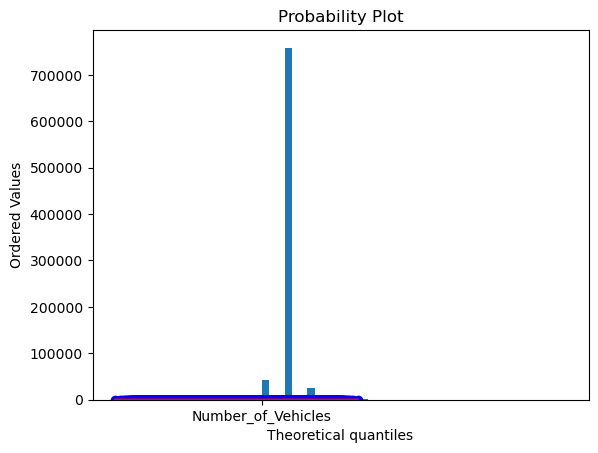

In [57]:
# Visual test for normality - Histogram/Boxplot/Q-Q plot of number of vehicles

# The data can be considered to have a non-uniform distribution from visual methods

df_Ac_clean['Number_of_Vehicles'].hist(bins=40)
df_Ac_clean['Number_of_Vehicles'].plot(kind='box')
stats.probplot(df_Ac_clean['Number_of_Vehicles'], dist="norm", plot=plt)
plt.show()

In [58]:
# Statistical test for normality of Number of casualties
check_normality(df_Ac_clean['Number_of_Casualties'], 'Number_of_Casualties')


Normality Tests for: Number_of_Casualties

Shapiro-Wilk Test:
  Statistic: 0.1738
  P-value: 0.0000
  Normal? No

Kolmogorov-Smirnov Test:
  Statistic: 0.5314
  P-value: 0.0000
  Normal? No


D:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 827861.
  res = hypotest_fun_out(*samples, **kwds)



Descriptive Statistics:
  Skewness: 24.5344 (normal ≈ 0. -1 to +1)
  Kurtosis: 3978.0675 (normal ≈ 0. -1 to +1)


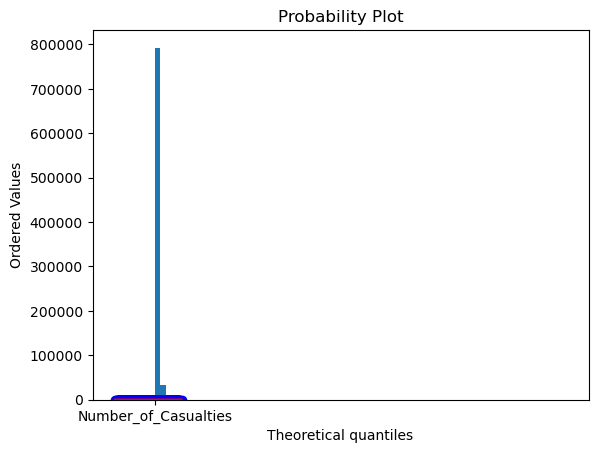

In [59]:
# Visual test for normality - Histogram/Boxplot/Q-Q plot of number of casualties

# The data can be considered to have a non-uniform distribution from visual methods

df_Ac_clean['Number_of_Casualties'].hist(bins=80)
df_Ac_clean['Number_of_Casualties'].plot(kind='box')
stats.probplot(df_Ac_clean['Number_of_Casualties'], dist="norm", plot=plt)
plt.show()

In [60]:
# Statistical test for normality for speed limit
check_normality(df_Ac_clean['Speed_limit'], 'Speed_limit')


Normality Tests for: Speed_limit

Shapiro-Wilk Test:
  Statistic: 0.4661
  P-value: 0.0000
  Normal? No


D:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 827861.
  res = hypotest_fun_out(*samples, **kwds)



Kolmogorov-Smirnov Test:
  Statistic: 0.4839
  P-value: 0.0000
  Normal? No

Descriptive Statistics:
  Skewness: 2.5323 (normal ≈ 0. -1 to +1)
  Kurtosis: 5.4532 (normal ≈ 0. -1 to +1)


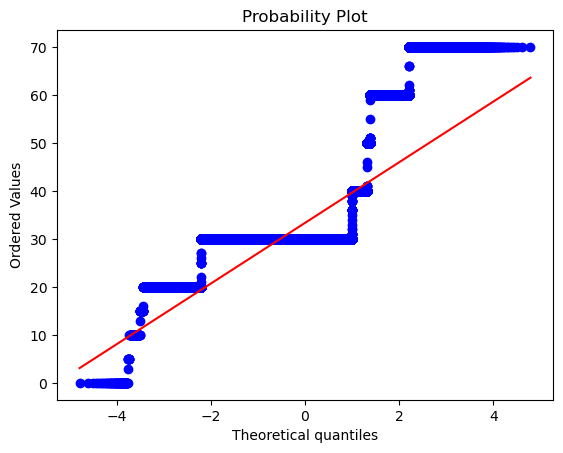

In [61]:
# Visual test for normality - Histogram/Boxplot/Q-Q plot for speed limit

# The data can be considered to have a non-uniform distribution from visual methods

# df_Ac_clean['Speed_limit'].hist(bins=30)
# df_Ac_clean['Speed_limit'].plot(kind='box')
stats.probplot(df_Ac_clean['Speed_limit'], dist="norm", plot=plt)
plt.show()

#### Bivariate analysis of Bikers dataset

In [62]:
# Contigency table for gender and accident severity
gender_severity_count_cross_table = count_cross_tabs(df_Bk_clean,'Gender','Severity') 
gender_severity_percent_cross_table = percent_cross_tabs(df_Bk_clean,'Gender','Severity')
gender_severity_percent_cross_table.round(2)

Severity,Fatal,Serious,Slight
Gender,,,
Female,0.71,16.01,83.28
Male,0.84,17.08,82.08
Other,0.00,2.52,97.48


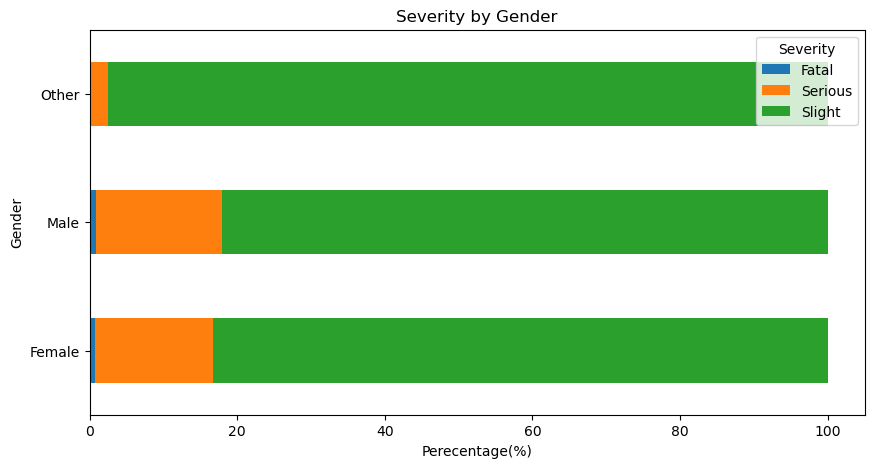

In [63]:
# Barchart for severity by gender
gender_severity_percent_cross_table.plot(kind='barh', stacked=True,xlabel='Perecentage(%)', 
                                         ylabel='Gender', title='Severity by Gender', layout='tight', figsize=(10,5))
plt.show()

In [64]:
# Contigency table for age group and accident severity
age_grp_severity_count_cross_table = count_cross_tabs(df_Bk_clean,'Age_Grp','Severity')
age_grp_severity_percent_cross_table = percent_cross_tabs(df_Bk_clean,'Age_Grp','Severity')
age_grp_severity_percent_cross_table.round(2)

Severity,Fatal,Serious,Slight
Age_Grp,,,
11 to 15,0.68,16.62,82.70
16 to 20,0.58,15.26,84.16
21 to 25,0.53,14.57,84.90
26 to 35,0.57,14.79,84.64
36 to 45,0.78,17.26,81.97
46 to 55,1.24,20.48,78.28
56 to 65,2.06,23.46,74.48
6 to 10,0.57,16.94,82.49
66 to 75,3.84,26.18,69.98


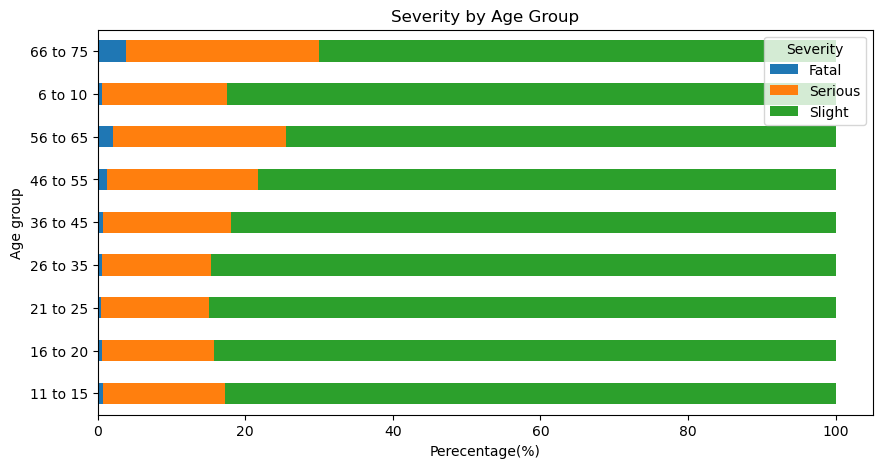

In [65]:
# Barchart for severity by age group
age_grp_severity_percent_cross_table.plot(kind='barh', stacked=True,xlabel='Perecentage(%)', 
                                         ylabel='Age group', title='Severity by Age Group', layout='tight', figsize=(10,5))
plt.show()

In [66]:
# Contigency table for age group and gender 
gender_age_group_count_cross_table = count_cross_tabs(df_Bk_clean,'Age_Grp','Gender')
gender_age_group_percent_cross_table = percent_cross_tabs(df_Bk_clean,'Age_Grp','Gender')
gender_age_group_percent_cross_table.round(2)

Gender,Female,Male,Other
Age_Grp,,,
11 to 15,15.19,84.79,0.02
16 to 20,18.48,81.50,0.02
21 to 25,25.67,74.32,0.01
26 to 35,22.54,77.45,0.01
36 to 45,20.78,79.21,0.01
46 to 55,23.54,76.45,0.01
56 to 65,24.16,75.82,0.01
6 to 10,17.27,82.68,0.04
66 to 75,21.50,78.48,0.02


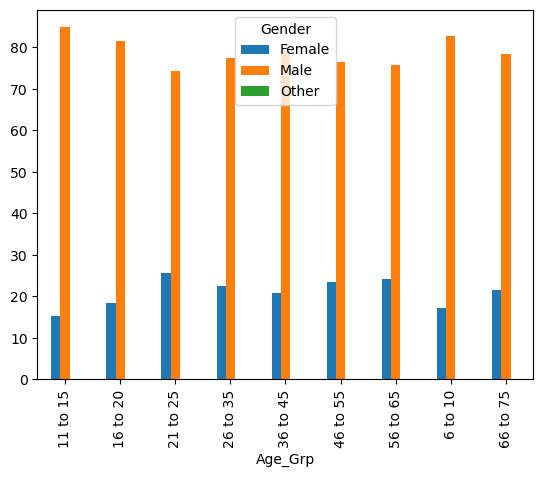

In [67]:
# Barchart for age group and gender
gender_age_group_percent_cross_table.plot(kind='bar')
plt.show()

#### Bivariate analysis for Accidents dataset

In [68]:
# Casualty statistics by day of the week
casualties_by_day = stats_groupby(df_Ac_clean,'Day','Number_of_Casualties')
casualties_by_day

,median,mean,count,sum,percentage
Day,,,,,
Sunday,1.0,1.068876,72841,77858,8.798699
Saturday,1.0,1.055812,87652,92544,10.587768
Monday,1.0,1.045305,125749,131446,15.189627
Friday,1.0,1.043630,132066,137828,15.952678
Thursday,1.0,1.044091,136263,142271,16.459647
Tuesday,1.0,1.043059,136534,142413,16.492382
Wednesday,1.0,1.042631,136756,142586,16.519198


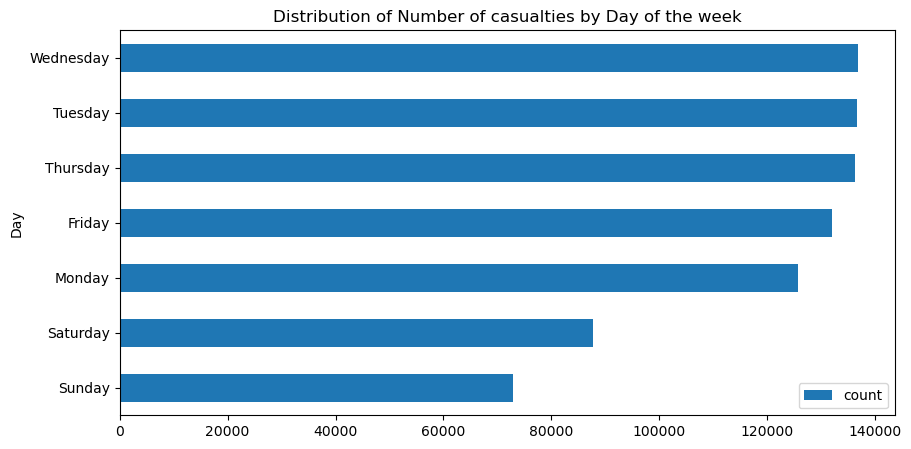

In [69]:
# Barchart of Casualty statistics by day of the week
casualties_by_day.plot(kind='barh', y='count', figsize=(10,5), title='Distribution of Number of casualties by Day of the week')
plt.show()

In [70]:
# Casualty statistics by road conditions
casualties_by_road_conditions = stats_groupby(df_Ac_clean,'Road_conditions','Number_of_Casualties')
casualties_by_road_conditions

,median,mean,count,sum,percentage
Road_conditions,,,,,
Flood,1.0,1.063433,268,285,0.032373
Missing Data,1.0,1.029733,1648,1697,0.199067
Snow,1.0,1.029825,1710,1761,0.206556
Frost,1.0,1.044684,6020,6289,0.727175
Wet,1.0,1.042305,184279,192075,22.259655
Dry,1.0,1.048748,633936,664839,76.575174


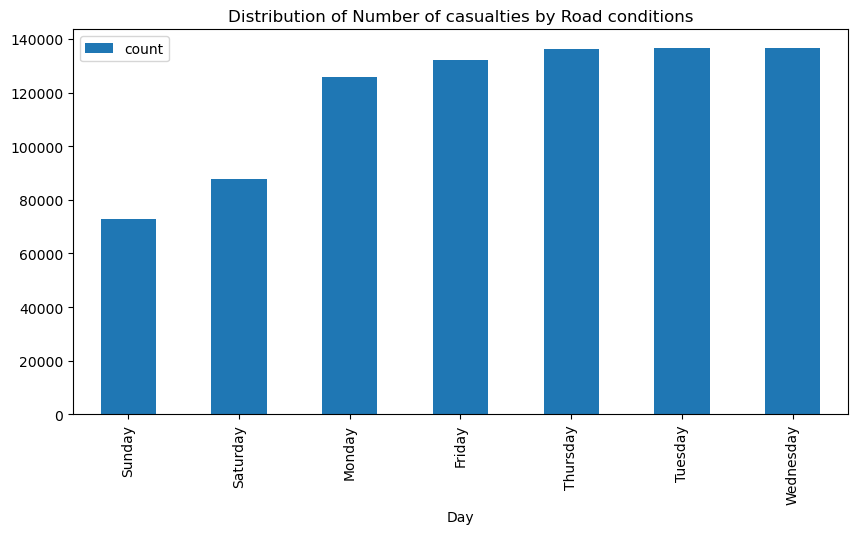

In [71]:
# Barchart of Casualty statistics by road conditions
casualties_by_day.plot(kind='bar', y='count', figsize=(10,5), title='Distribution of Number of casualties by Road conditions')
plt.show()

In [72]:
# Casualty statistics by weather conditions
casualties_by_weather_conditions = stats_groupby(df_Ac_clean,'Weather_conditions','Number_of_Casualties')
casualties_by_weather_conditions

,median,mean,count,sum,percentage
Weather_conditions,,,,,
Snow and windy,1.0,1.031056,483,498,0.058343
Snow,1.0,1.034995,2086,2159,0.251975
Fog,1.0,1.032651,3369,3479,0.406952
Rain and windy,1.0,1.034741,8808,9114,1.063947
Other,1.0,1.022673,11820,12088,1.427776
Clear and windy,1.0,1.045076,11891,12427,1.436352
Unknown,1.0,1.045389,24235,25335,2.927424
Rain,1.0,1.038802,82007,85189,9.905890
Clear,1.0,1.049029,683162,716657,82.521341


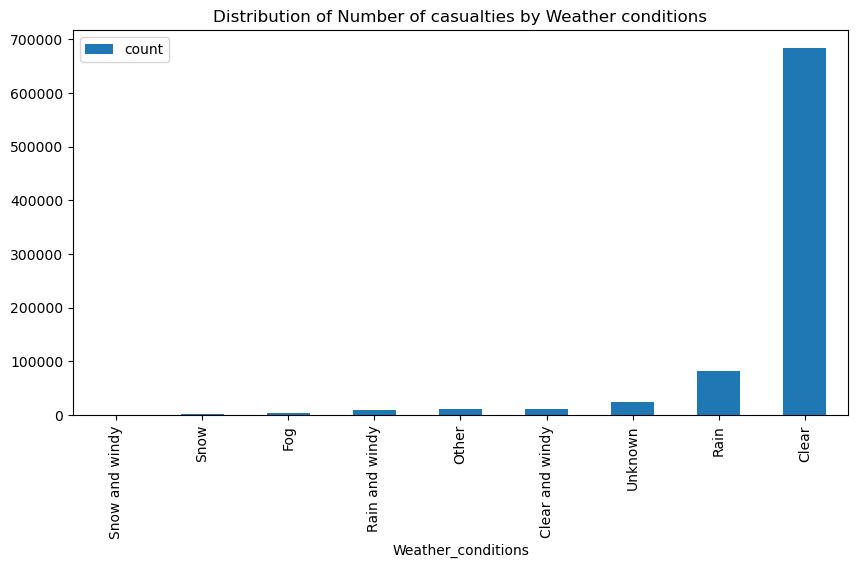

In [73]:
# Barchart of Casualty statistics by weather conditions
casualties_by_weather_conditions.plot(kind='bar', y='count', figsize=(10,5), title='Distribution of Number of casualties by Weather conditions')
plt.show()

In [74]:
# Casualty statistics by road type
casualties_by_road_type = stats_groupby(df_Ac_clean,'Road_type','Number_of_Casualties')
casualties_by_road_type

,median,mean,count,sum,percentage
Road_type,,,,,
Slip road,1.0,1.034279,846,875,0.102191
One way street,1.0,1.034880,5562,5756,0.671852
Unknown,1.0,1.042941,30647,31963,3.701950
Dual carriageway,1.0,1.055033,59037,62286,7.131270
Roundabout,1.0,1.018317,75066,76441,9.067464
Single carriageway,1.0,1.050132,656703,689625,79.325273


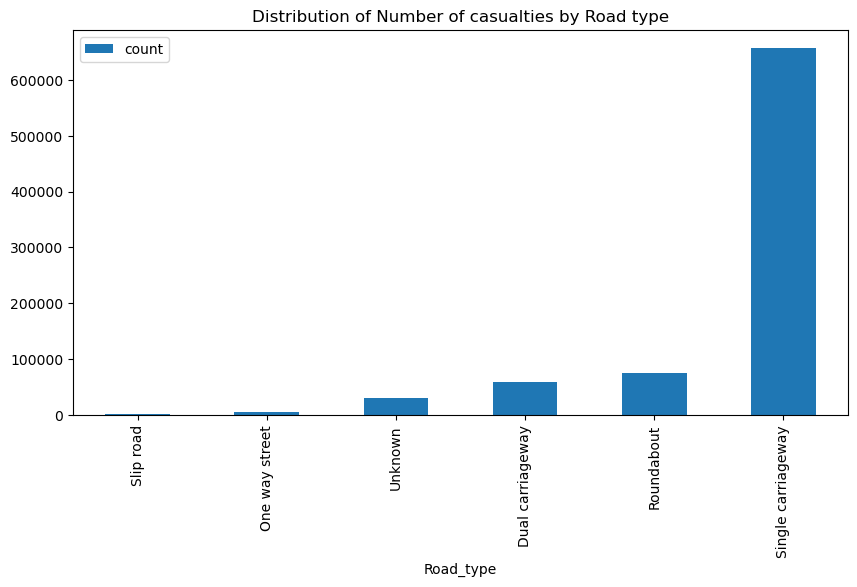

In [75]:
# Barchart of Casualty statistics by road type
casualties_by_road_type.plot(kind='bar', y='count', figsize=(10,5), title='Distribution of Number of casualties by Road type')
plt.show()

In [76]:
# Casualty statistics by light conditions
casualties_by_light_conditions = stats_groupby(df_Ac_clean,'Light_conditions','Number_of_Casualties')
casualties_by_light_conditions

,median,mean,count,sum,percentage
Light_conditions,,,,,
Darkness no lights,1.0,1.065249,25165,26807,3.039762
Darkness lights lit,1.0,1.039531,142039,147654,17.157349
Daylight,1.0,1.048176,660657,692485,79.802890


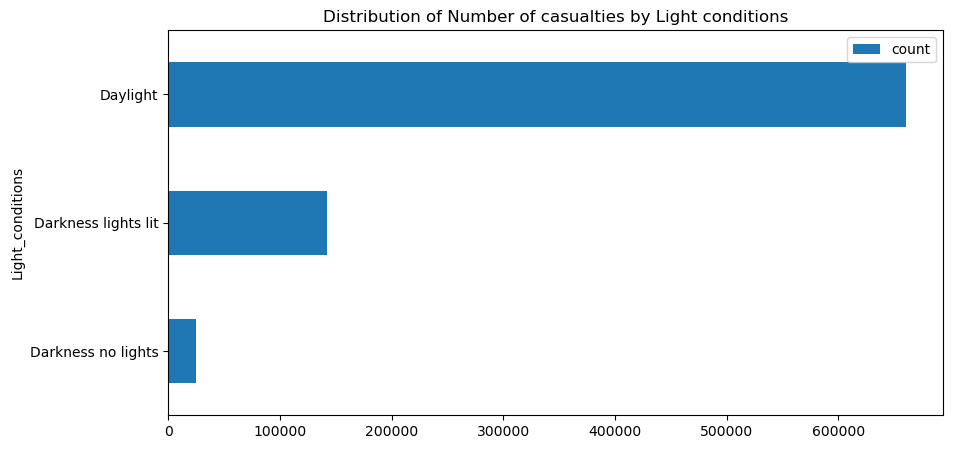

In [77]:
# Barchart of Casualty statistics by light conditions
casualties_by_light_conditions.plot(kind='barh', y='count', figsize=(10,5), title='Distribution of Number of casualties by Light conditions')
plt.show()

In [78]:
# Casualty statistics by gender
casualties_by_gender = stats_groupby(df_Ac_Bk_clean,'Gender','Number_of_Casualties')
casualties_by_gender

,median,mean,count,sum,percentage
Gender,,,,,
Other,1.0,1.042017,119,124,0.014374
Female,1.0,1.044694,167717,175213,20.259077
Male,1.0,1.047853,660025,691609,79.726548


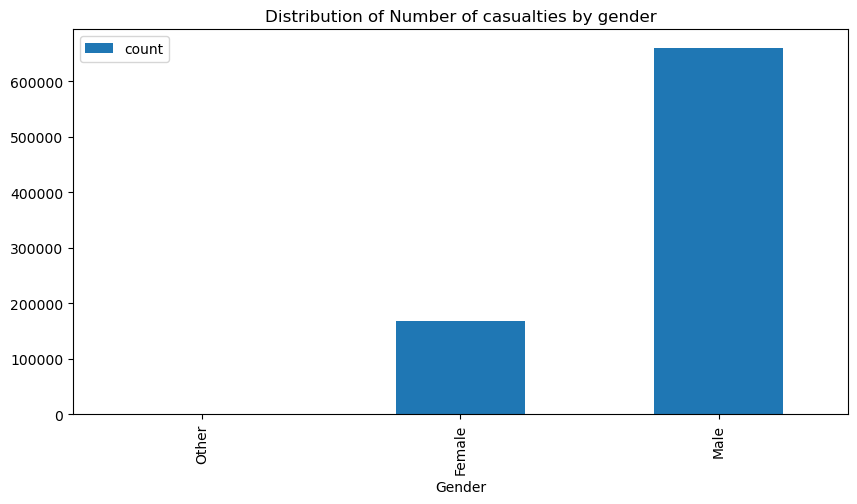

In [79]:
# Barchart of Casualty statistics by gender
casualties_by_gender.plot(kind='bar', y='count', figsize=(10,5), title='Distribution of Number of casualties by gender')
plt.show()

In [80]:
# Casualty statistics by age group
casualties_by_age_grp = stats_groupby(df_Ac_Bk_clean,'Age_Grp','Number_of_Casualties')
casualties_by_age_grp

,median,mean,count,sum,percentage
Age_Grp,,,,,
66 to 75,1.0,1.050054,15663,16447,1.891984
56 to 65,1.0,1.043924,41913,43754,5.062806
6 to 10,1.0,1.045559,68021,71120,8.216476
46 to 55,1.0,1.041739,73577,76648,8.887603
21 to 25,1.0,1.041058,87291,90875,10.544161
36 to 45,1.0,1.040367,103773,107962,12.535075
16 to 20,1.0,1.050994,122602,128854,14.809491
26 to 35,1.0,1.038979,145078,150733,17.524439
11 to 15,1.0,1.062433,169943,180553,20.527963


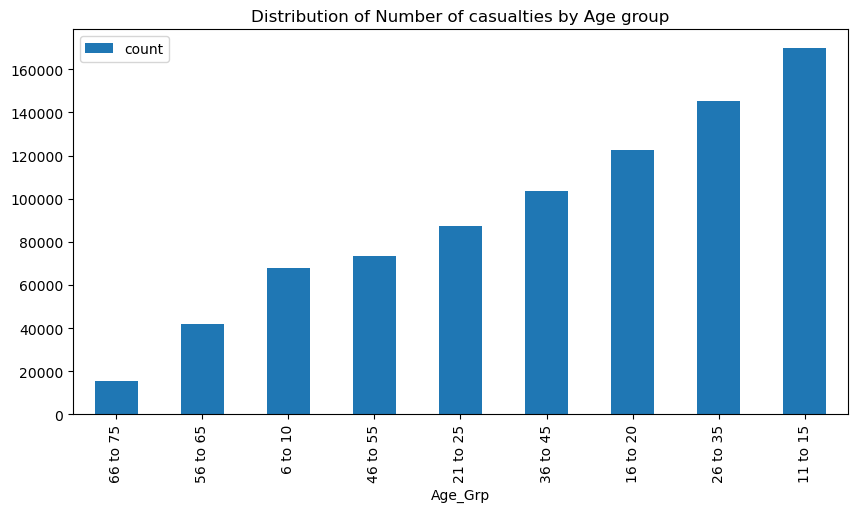

In [81]:
# Barchart of Casualty statistics by gender
casualties_by_age_grp.plot(kind='bar', y='count', figsize=(10,5), title='Distribution of Number of casualties by Age group')
plt.show()

In [82]:
# Casualty burdern light condition and road type 
casualties_by_road_type_light_conditions = pd.DataFrame(df_Ac_clean.groupby(['Road_type','Light_conditions'], as_index=False)['Number_of_Casualties'].sum())
casualties_by_road_type_light_conditions

,Road_type,Light_conditions,Number_of_Casualties
0,Dual carriageway,Darkness lights lit,11359
1,Dual carriageway,Darkness no lights,2319
2,Dual carriageway,Daylight,48608
3,One way street,Darkness lights lit,1111
4,One way street,Darkness no lights,95
5,One way street,Daylight,4550
6,Roundabout,Darkness lights lit,19057
7,Roundabout,Darkness no lights,1807
8,Roundabout,Daylight,55577
9,Single carriageway,Darkness lights lit,111214


In [83]:
# Casualty burdern weather condition and road type
casualties_by_road_type_weather_conditions = pd.DataFrame(df_Ac_clean.groupby(['Road_type','Weather_conditions'], as_index=False)['Number_of_Casualties'].sum())
casualties_by_road_type_weather_conditions

,Road_type,Weather_conditions,Number_of_Casualties
0,Dual carriageway,Clear,51436
1,Dual carriageway,Clear and windy,1138
2,Dual carriageway,Fog,239
3,Dual carriageway,Other,781
4,Dual carriageway,Rain,6121
5,Dual carriageway,Rain and windy,740
6,Dual carriageway,Snow,150
7,Dual carriageway,Snow and windy,37
8,Dual carriageway,Unknown,1644
9,One way street,Clear,4976


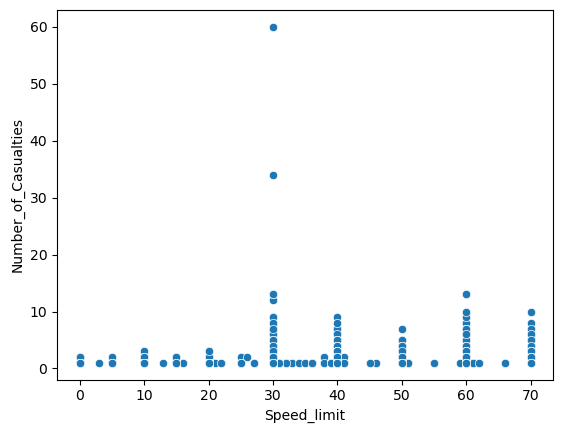

In [84]:
# Scatterplot of Speed limit and number of casualties
sns.scatterplot(data = df_Ac_clean, x= df_Ac_clean["Speed_limit"], y= df_Ac_clean['Number_of_Casualties'])
plt.show()

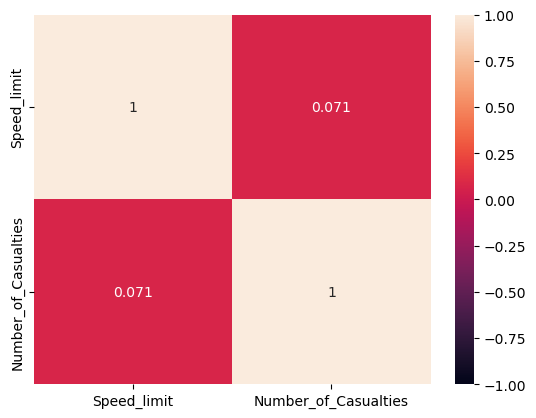

In [85]:
df_Ac_clean_corr = df_Ac_clean[["Speed_limit",'Number_of_Casualties']].corr()
heatmap = sns.heatmap(df_Ac_clean_corr, vmin=-1, vmax=1, annot=True)
plt.show()

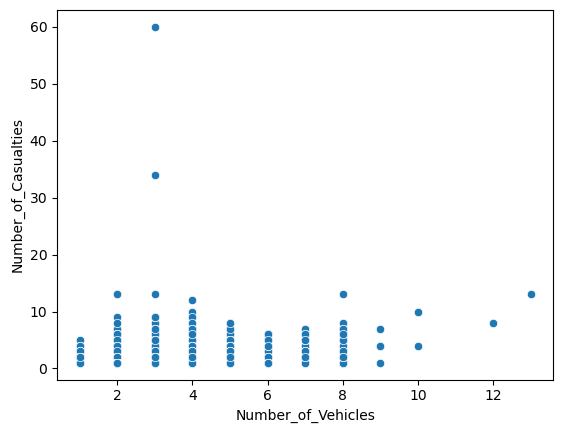

In [86]:
# Scatterplot of number of vehicles and number of casualties
sns.scatterplot(data = df_Ac_clean, x= df_Ac_clean["Number_of_Vehicles"], y= df_Ac_clean['Number_of_Casualties'])
plt.show()

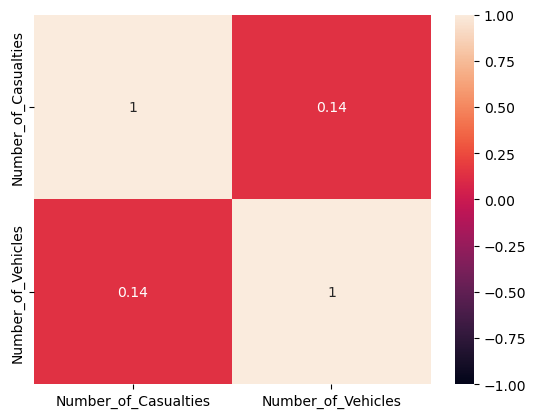

In [87]:
df_Ac_clean_corr = df_Ac_clean[["Number_of_Casualties",'Number_of_Vehicles']].corr()
heatmap = sns.heatmap(df_Ac_clean_corr, vmin=-1, vmax=1, annot=True)
plt.show()

#### Time Series Analysis

In [88]:
# Casualties per year

# set index of dataframe to Date
df_Ac_time_series = change_index(df_Ac_clean,'Date',False)

casualties_per_year = pd.DataFrame(df_Ac_time_series.resample('YE')["Number_of_Casualties"].sum())
casualties_per_month = pd.DataFrame(df_Ac_time_series.resample('ME')["Number_of_Casualties"].sum())

In [89]:
# # Create a complete date range for comparison
# expected_range_year = pd.date_range(start=1979, end=2018, freq='YE')
# expected_range_month = pd.date_range(start=1979, end=2018, freq='ME')

# # Find missing dates
# missing_dates_months = expected_range.difference(casualties_per_month.index)
# missing_dates_year = expected_range.difference(casualties_per_month.index)
# print(f"Missing months: {len(missing_dates_months)}")
# print(f"Missing years: {len(missing_dates_year)}")

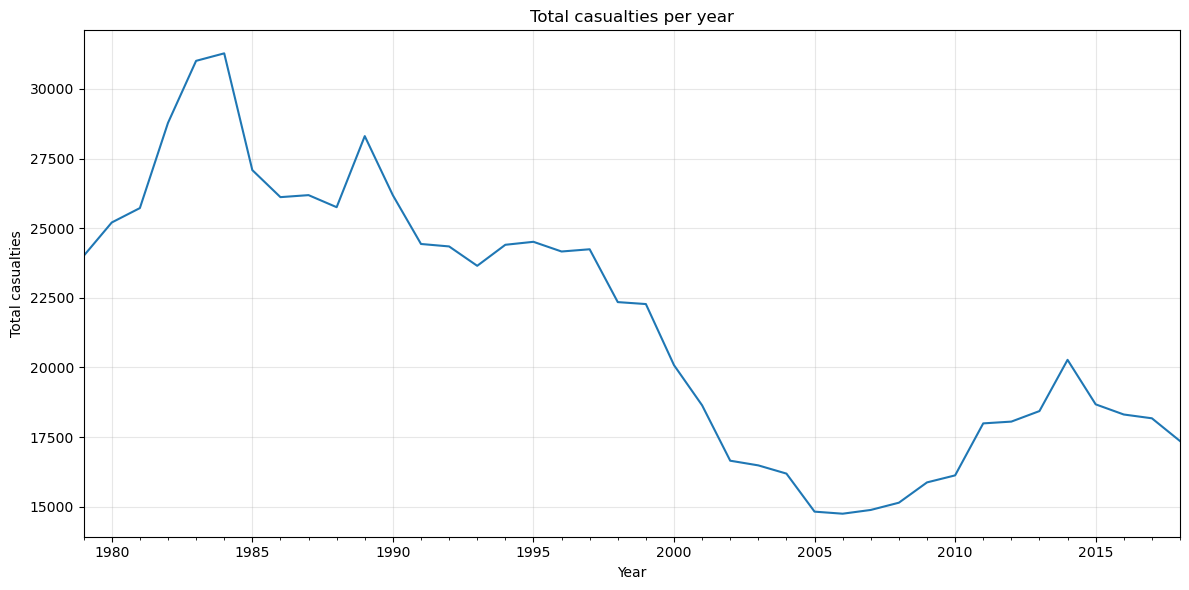

In [90]:
# Line graph of casualties per year(1979 - 2018)
casualties_per_year['Number_of_Casualties'].plot(
    xlabel="Year", 
    ylabel="Total casualties", 
    title="Total casualties per year", 
    figsize=(12,6))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

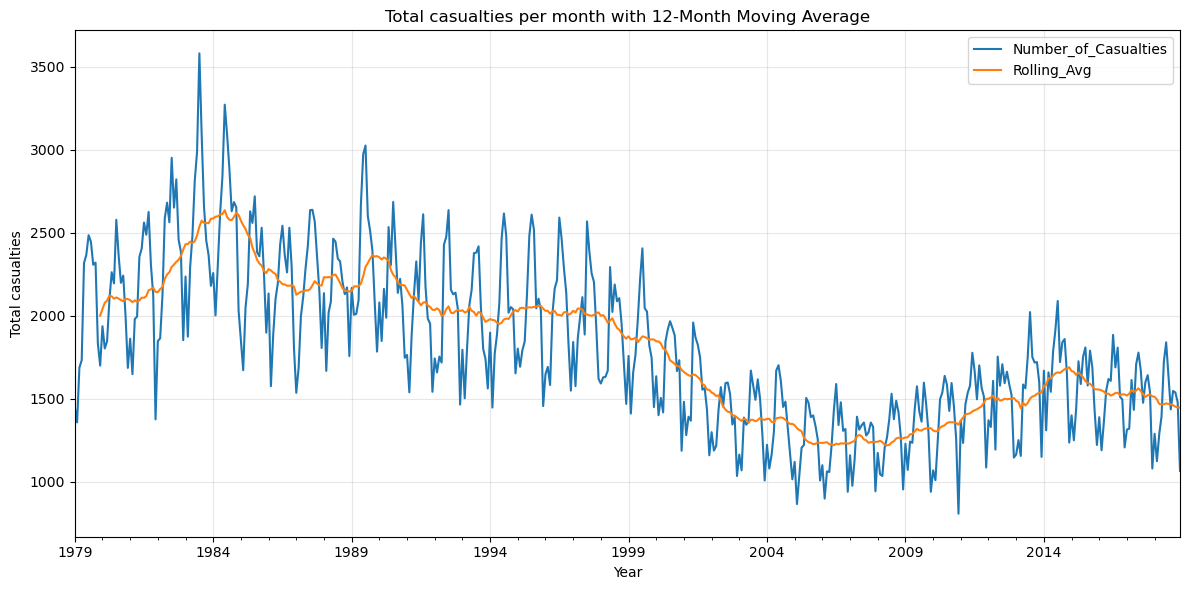

In [91]:
# Line graph of casualties per month(1979 - 2018)
casualties_per_month['Rolling_Avg'] = casualties_per_month['Number_of_Casualties'].rolling(window=12).mean()
casualties_per_month[['Number_of_Casualties','Rolling_Avg']].plot(
    xlabel="Year", 
    ylabel="Total casualties", 
    title="Total casualties per month with 12-Month Moving Average", 
    figsize=(12,6))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

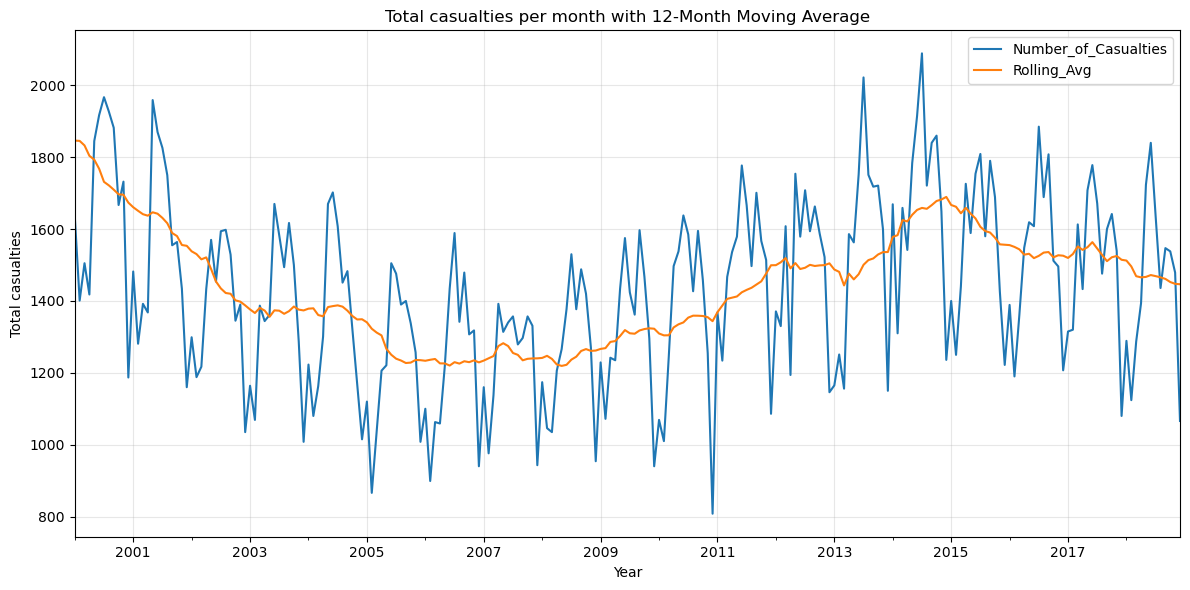

In [92]:
# Line graph of casualties per month(2000 - 2018)
casualties_per_month['Rolling_Avg'] = casualties_per_month['Number_of_Casualties'].rolling(window=12).mean()
recent_data = casualties_per_month['2000':]
recent_data[['Number_of_Casualties','Rolling_Avg']].plot(
    xlabel="Year", 
    ylabel="Total casualties", 
    title="Total casualties per month with 12-Month Moving Average", 
    figsize=(12,6))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

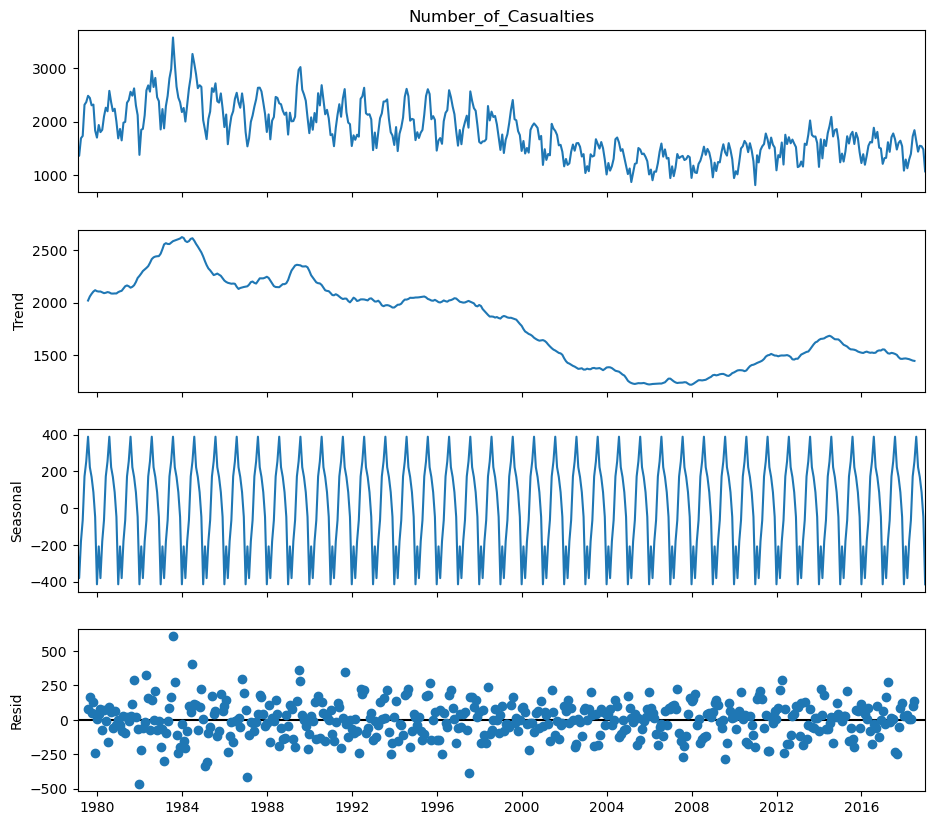

In [93]:
# Decomposition of number of casualties over time
decomposition_multi = seasonal_decompose(casualties_per_month["Number_of_Casualties"], model='additive', period = 12)
fig = decomposition_multi.plot()
fig.set_size_inches((10, 9))
plt.show()

In [94]:
# 1. Extract specific components
trend = decomposition_multi.trend
seasonal = decomposition_multi.seasonal
residual = decomposition_multi.resid

# 2. Identify which months have highest casualties
seasonal_pattern = seasonal[:12]  # First year's pattern (repeats every year)
seasonal_df = pd.DataFrame({
    'Month': range(1, 13),
    'Seasonal_Effect': seasonal_pattern.values
})
print(seasonal_df.sort_values('Seasonal_Effect', ascending=False))

    Month  Seasonal_Effect
6       7       389.225873
5       6       255.194890
7       8       223.088052
4       5       172.984420
8       9       169.792112
9      10        86.607283
10     11       -47.499555
3       4       -65.614939
2       3      -180.416222
0       1      -208.087162
1       2      -380.818999
11     12      -414.455751


In [95]:
# Number of vehicles involved Accidents per year

vehicles_in_accidents_per_year = pd.DataFrame(df_Ac_time_series.resample("YE")["Number_of_Vehicles"].sum())
vehicles_in_accidents_per_year

,Number_of_Vehicles
Date,
1979-12-31,44300
1980-12-31,46317
1981-12-31,47327
1982-12-31,52835
1983-12-31,57485
1984-12-31,58094
1985-12-31,50566
1986-12-31,49131
1987-12-31,49324


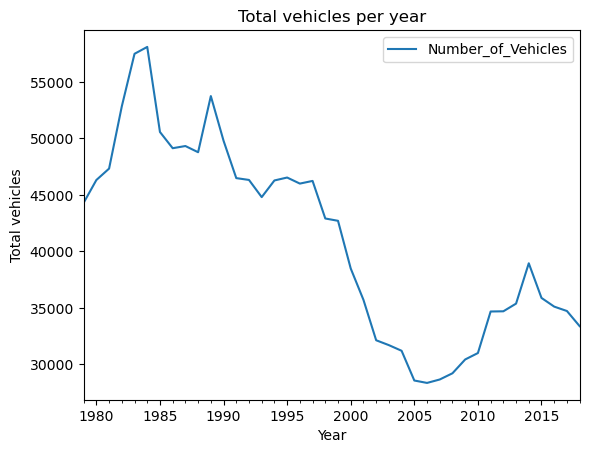

In [96]:
# Line graph of Number of vehicles involved Accidents per year
vehicles_in_accidents_per_year.plot(xlabel="Year", ylabel="Total vehicles", title="Total vehicles per year")
plt.show()

In [97]:
# Casualties per month over the years

df_Ac_time_series["Month"] = df_Ac_clean["Date"].dt.month.values
casualties_per_month = pd.DataFrame(
    df_Ac_time_series.groupby("Month")["Number_of_Casualties"].mean()
)
casualties_per_month

,Number_of_Casualties
Month,
1,1.040373
2,1.043477
3,1.045952
4,1.050060
5,1.049654
6,1.049719
7,1.052258
8,1.052059
9,1.047310


In [ ]:
# Line graph of Casualties per month over the years
casualties_per_month=casualties_per_month.sort_values(by="Month",ascending=True)
cpm_graph = casualties_per_month.plot(xlabel="Month", ylabel="Mean_of_Casualties", title="Mean casualties per month")
cpm_graph.set_xticks(range(1,13))
plt.show()

# relate with seasons. Warmer = More casulaties

In [ ]:
# Accidents per month over the years

df_Ac_time_series["Month"] = df_Ac_clean["Date"].dt.month.values
accidents_per_month = pd.DataFrame(
    df_Ac_time_series.groupby("Month")["Accident_Index"].nunique()
)
accidents_per_month

In [ ]:
# Line graph of Accidents per month over the years
accidents_per_month=accidents_per_month.sort_values(by="Month",ascending=True)
apm_graph = accidents_per_month.plot(xlabel="Month", ylabel="Number_of_Accidents", title="Total accidents per month")
apm_graph.set_xticks(range(1,13))
plt.show()

# relate with seasons. Warmer = More casulaties

In [ ]:
# Accidents per traffic status
accidents_per_traffic_status = pd.DataFrame(
    df_Ac_clean.groupby("Traffic_status")["Accident_Index"].nunique().sort_values()
)
accidents_per_traffic_status

In [ ]:
# Bar chart of accidents per traffic status
accidents_per_traffic_status.plot(kind='barh', xlabel="Traffic status", ylabel="Number_of_Accidents", title="Total accidents per traffic status")
# plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
# Casualties per traffic status
casualties_per_traffic_status = stats_groupby(df_Ac_clean,'Traffic_status','Number_of_Casualties')
casualties_per_traffic_status

In [ ]:
# Bar chart of Casualties per traffic status
casualties_per_traffic_status.plot(kind='barh',y='count', figsize=(10,5), xlabel="Number_of_Casualties", ylabel="Traffic status", title="Total casualties per traffic status")
plt.show()

### Inferential Statistics

In [ ]:
# Test if a relationship exists between road conditions and number of casualties

# Road_conditions[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Road_conditions','Number_of_Casualties')

# KruskalResult(statistic=np.float64(161.7817388834576), pvalue=np.float64(4.128411472930475e-33))

In [ ]:
# Test if a relationship exists between road type and number of casualties

# Road_type[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Road_type','Number_of_Casualties')

# KruskalResult(statistic=np.float64(1339.4839671774698), pvalue=np.float64(1.782172044150907e-287))

In [ ]:
# Visualisation of matrix

dunn_result = run_dunn_test(df_Ac_Bk_clean,'Road_type','Number_of_Casualties')
dunn_result

plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result, annot=True, cmap='viridis', fmt=".2e")
plt.show()

In [ ]:
# Test if a relationship exists between weather condition and number of casualties

# weather_condition[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Weather_conditions','Number_of_Casualties')

# KruskalResult(statistic=np.float64(333.93931612338326), pvalue=np.float64(2.418724937241877e-67))

In [ ]:
# Test if a relationship exists between Light conditions and number of casualties

# Light conditions[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Light_conditions','Number_of_Casualties')

# KruskalResult(statistic=np.float64(272.4180174400154), pvalue=np.float64(7.001307096078676e-60))

In [ ]:
# Test if a relationship exists between age group and number of casualties

# age_type[ordinal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Ordinal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Age_Grp','Number_of_Casualties')

# KruskalResult(statistic=np.float64(1287.2840214784853), pvalue=np.float64(1.3171466054277861e-272))

In [ ]:
# Test if a relationship exists between gender and number of casualties

# Gender[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal-Wallis is suitable
# Conditions 1. Nominal IV with 3 levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Gender','Number_of_Casualties')

# KruskalResult(statistic=np.float64(24.72630678580953), pvalue=np.float64(4.273175232476011e-06))

In [ ]:
# Test if a relationship exists between traffic status(time of the day) and number of casualties

# Traffic_status[Ordinal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal-Wallis is suitable
# Conditions 1. Ordinal IV with 2+ levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Traffic_status','Number_of_Casualties')

# KruskalResult(statistic=np.float64(300.6675416416083), pvalue=np.float64(7.776939894578762e-64))

In [ ]:
# Test if a relationship exists between day of the week and number of casualties

# Day[Ordinal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal-Wallis is suitable
# Conditions 1. Ordinal IV with 2+ levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Day','Number_of_Casualties')

# KruskalResult(statistic=np.float64(628.1438264081472), pvalue=np.float64(1.9774018406957693e-132))

In [ ]:
# Test if a relationship exists between road conditions and severity

# road conditions[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Road_conditions','Severity')

# chi_statistic=np.float64(78.14791028431614), pvalue=np.float64(1.1569360455583465e-12)

In [ ]:
# Test if a relationship exists between road type and severity

# road type[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Road_type','Severity')

# chi_statistic=np.float64(2884.0712678298723), pvalue=np.float64(0.0)

In [ ]:
# Test if a relationship exists between weather conditions and severity

# weather conditions[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Weather_conditions','Severity')

# chi_statistic=np.float64(480.79146189280453), pvalue=np.float64(3.752285040730424e-92)

In [ ]:
# Test if a relationship exists between light conditions and severity

# light conditions[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Light_conditions','Severity')

# chi_statistic=np.float64(2923.2510284691148), pvalue=np.float64(0.0)

In [ ]:
# Test if a relationship exists between gender and severity

# Gender[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Gender','Severity')

# chi_statistic=np.float64(158.42511032047113), pvalue=np.float64(3.181755088992447e-33) but failed expected value < 5 assumption

In [ ]:
# Test if a relationship exists between age group and severity

# Age group[Ordinal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Age_Grp','Severity')

# chi_statistic=np.float64(7371.501195524569), pvalue=np.float64(0.0)

In [ ]:
# Test if a relationship exists between time of the day and severity

# Age group[Ordinal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Traffic_status','Severity')

# chi_statistic=np.float64(1474.4563765293549), pvalue=np.float64(0.0)